In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('shapesDB.csv', delimiter=';')
df.head()

,class,vertices,faces,triangles,quads,bmin,bmax
0,AircraftBuoyant,201,340,340,0,"(0, 0, 0)","(0.889234, 0.975, 0.889234)"
1,AircraftBuoyant,8761,16960,16960,0,"(0, 0, 0)","(0.933058, 0.975, 0.937901)"
2,AircraftBuoyant,1878,6173,6173,0,"(0, 0, 0)","(0.607072, 0.975, 0.626812)"
3,AircraftBuoyant,778,1457,1457,0,"(0, 0, 0)","(0.367686, 0.975, 0.367689)"
4,AircraftBuoyant,425,824,824,0,"(0, 0, 0)","(0.379575, 0.975, 0.379575)"


In [22]:
df.columns = df.columns.str.strip()
df.columns

Index(['class', 'vertices', 'faces', 'triangles', 'quads', 'bmin', 'bmax'], dtype='object')

In [23]:
numeric_columns = ['vertices', 'faces', 'triangles', 'quads']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [25]:

average_vertices = df['vertices'].mean()
average_faces = df['faces'].mean()

print(f"Average of vertices: {average_vertices:.2f}")
print(f"Average of faces: {average_faces:.2f}")


Average of vertices: 5609.78
Average of faces: 10691.53


# Identify Outliers

In [27]:
std_vertices = df['vertices'].std()
std_faces = df['faces'].std()

print(f"std of vertices: {std_vertices:.2f}")
print(f"std of faces: {std_faces:.2f}")

# outlier thresholds = 2 standard deviations from the mean
threshold_vertices_high = average_vertices + 2 * std_vertices
threshold_vertices_low = average_vertices - 2 * std_vertices

threshold_faces_high = average_faces + 2 * std_faces
threshold_faces_low = average_faces - 2 * std_faces

print(f"Vertices outlier thresholds: Low={threshold_vertices_low:.2f}, High={threshold_vertices_high:.2f}")
print(f"Faces outlier thresholds: Low={threshold_faces_low:.2f}, High={threshold_faces_high:.2f}")


std of vertices: 9851.16
std of faces: 16191.23
Vertices outlier thresholds: Low=-14092.54, High=25312.10
Faces outlier thresholds: Low=-21690.94, High=43073.99


In [54]:
outliers_vertices_high = df[df['vertices'] > threshold_vertices_high]

outliers_faces_high = df[df['faces'] > threshold_faces_high]

print("Shapes with significantly more vertices:")
print(len(outliers_vertices_high[['class', 'vertices', 'faces']]))

print("\nShapes with significantly more faces:")
print(len(outliers_faces_high[['class', 'vertices', 'faces']]))

Shapes with significantly more vertices:
114

Shapes with significantly more faces:
133


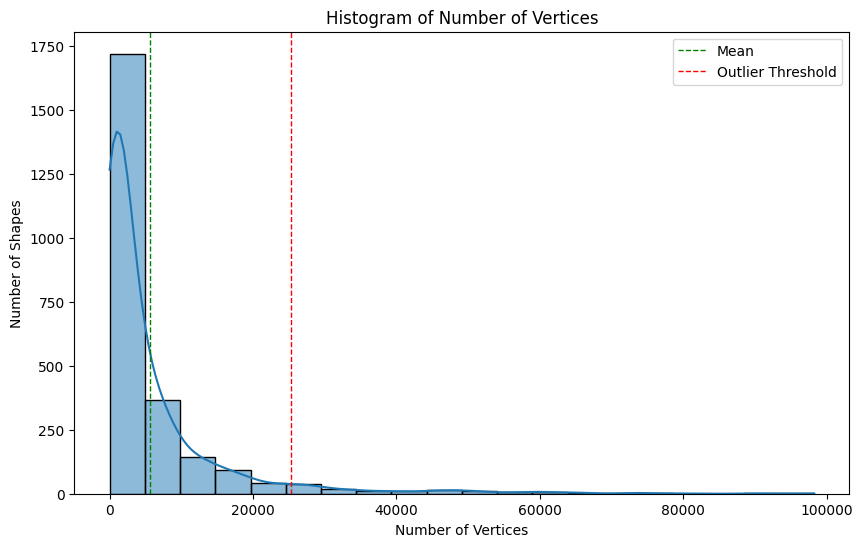

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['vertices'], bins=20, kde=True)
plt.axvline(average_vertices, color='green', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(threshold_vertices_high, color='red', linestyle='dashed', linewidth=1, label='Outlier Threshold')
plt.title('Histogram of Number of Vertices')
plt.xlabel('Number of Vertices')
plt.ylabel('Number of Shapes')
plt.legend()
plt.show()


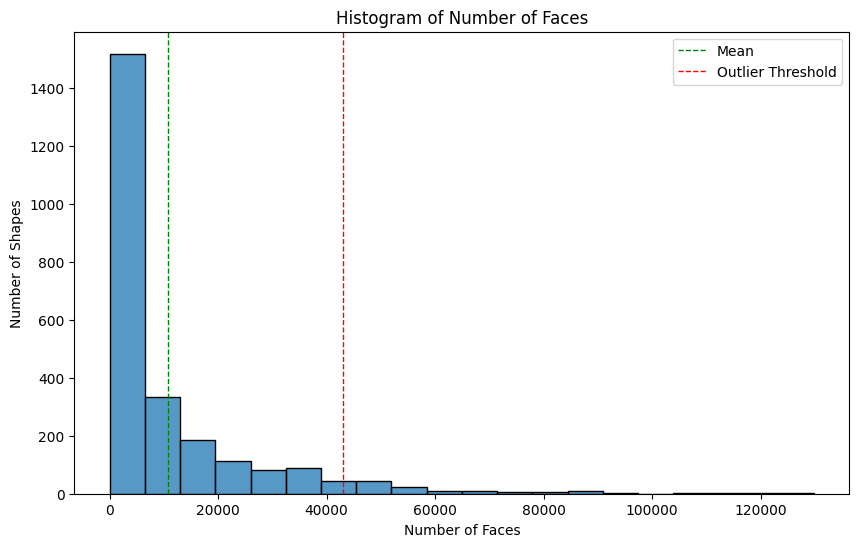

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['faces'], bins=20, kde=False)
plt.axvline(average_faces, color='green', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(threshold_faces_high, color='red', linestyle='dashed', linewidth=1, label='Outlier Threshold')
plt.title('Histogram of Number of Faces')
plt.xlabel('Number of Faces')
plt.ylabel('Number of Shapes')
plt.legend()
plt.show()
